Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Accuracy :  76.0


,Temperature,Humidity,Real Values,Predicted Values
0,24.443455,82.454326,rice,rice
1,21.446540,84.943760,rice,rice
2,22.139747,23.022511,kidneybeans,kidneybeans
3,26.126434,81.813650,banana,rice
4,26.475226,78.518338,banana,banana
...,...,...,...,...
295,18.369526,19.563810,chickpea,chickpea
296,22.084583,82.829041,cotton,rice
297,24.184712,69.948073,coffee,maize
298,29.093823,45.566106,mango,mango


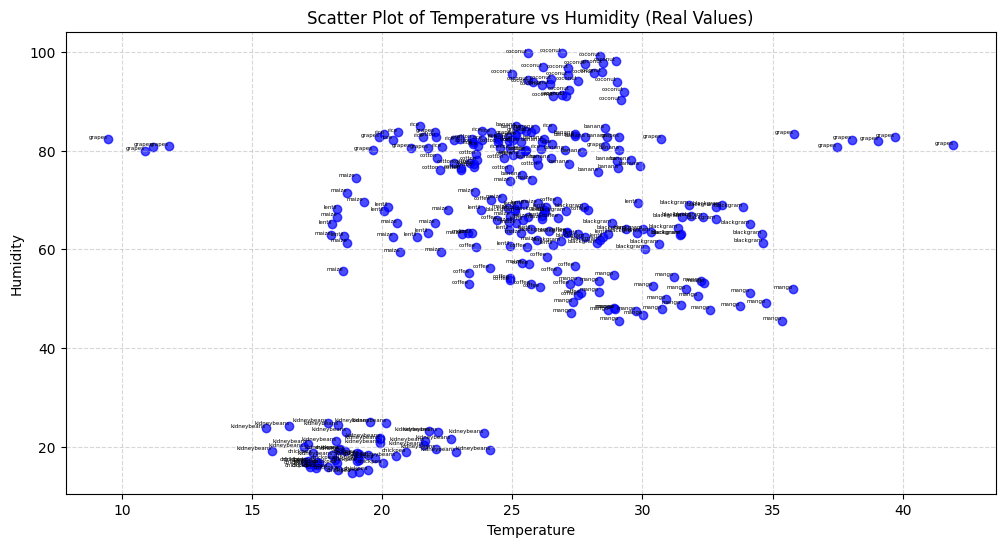

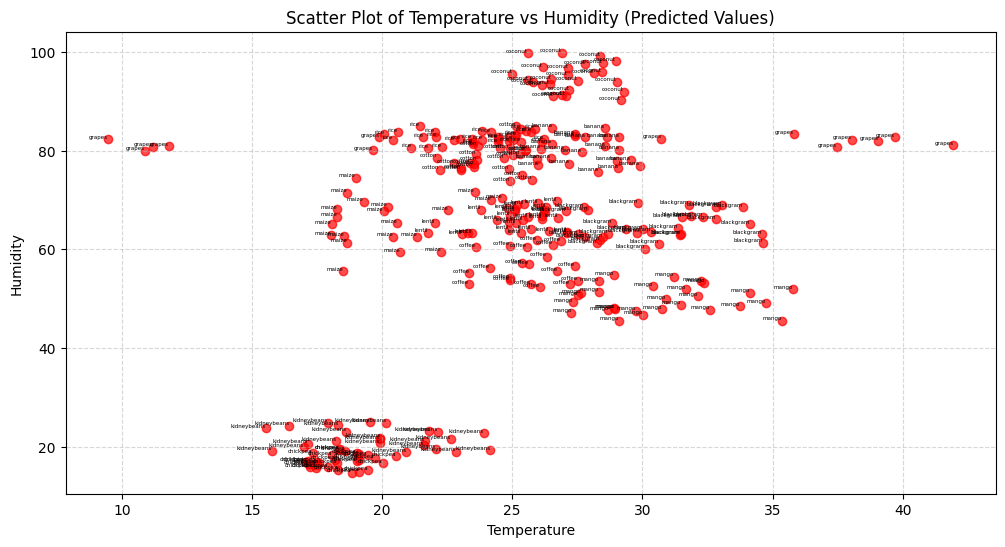

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Install tabulate
%pip install tabulate
from tabulate import tabulate  # Install tabulate using: pip install tabulate

# Install seaborn
%pip install seaborn
import seaborn as sns

# Load dataset
dataset = pd.read_csv('Crop_recommendation.csv')
X = dataset.iloc[:, :2].values
y = dataset['label'].values
dataset

# Split dataset
from sklearn.model_selection import train_test_split
random_state_input = input("Enter a random state: ")
random_state = int(random_state_input)  # Assuming random_state is expected to be an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

# Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Train the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_scaled)

# Calculate the confusion matrix to evaluate the performance of the classifier on the test set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate and print the accuracy of the Gaussian Naive Bayes classifier
from sklearn.metrics import accuracy_score 
print ("\n\nAccuracy : ", ((accuracy_score(y_test, y_pred)*100)))

# Create a DataFrame with original temperature, humidity, real, and predicted values
df = pd.DataFrame({'Temperature': X_test[:, 0], 'Humidity': X_test[:, 1], 'Real Values': y_test, 'Predicted Values': y_pred})

# # Display the DataFrame in a vertical table
# print("\n", tabulate(df, headers='keys', tablefmt='pretty'))

display(df)

# Create a scatter plot for Real Values with crop names
plt.figure(figsize=(12, 6))
for i, row in df.iterrows():
    plt.scatter(row['Temperature'], row['Humidity'], c='blue', alpha=0.7)
    plt.text(row['Temperature'], row['Humidity'], row['Real Values'], fontsize=4, ha='right', va='bottom')

plt.title('Scatter Plot of Temperature vs Humidity (Real Values)')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Create a scatter plot for Predicted Values with crop names
plt.figure(figsize=(12, 6))
for i, row in df.iterrows():
    plt.scatter(row['Temperature'], row['Humidity'], c='red', alpha=0.7)
    plt.text(row['Temperature'], row['Humidity'], row['Predicted Values'], fontsize=4, ha='right', va='bottom')

plt.title('Scatter Plot of Temperature vs Humidity (Predicted Values)')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()